In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
img_size=256
Batch_size=32
channels=3
Epochs=50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    shuffle=True,
    image_size=(img_size,img_size),
    batch_size=Batch_size
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names =dataset.class_names
class_names

['Early_blight', 'Healthy', 'Late_blight']

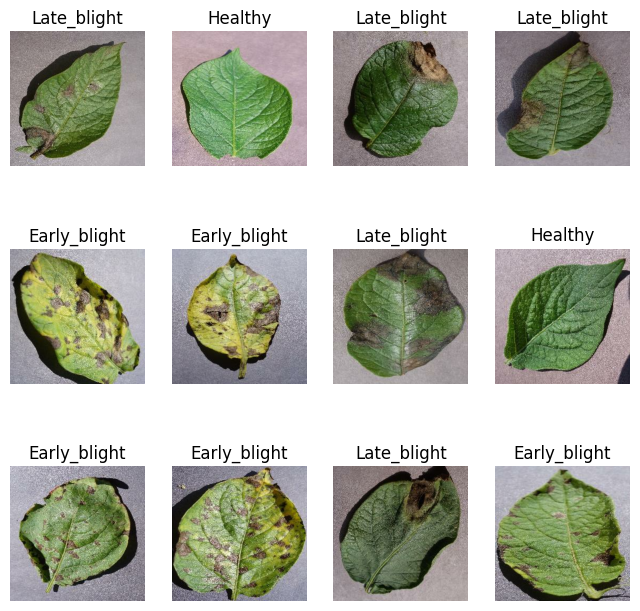

In [ ]:
for image_batch,label_batch in dataset.take(1):
    plt.figure(figsize=(8,8))
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [ ]:
def get_dataset_partitions(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(dataset)

    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    test_size=int(test_split*ds_size)
    
    train_ds=dataset.take(train_size)
    temp_test=dataset.skip(train_size)
    val_ds=temp_test.take(test_size)
    test_ds=temp_test.skip(test_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(test_ds)

8

In [ ]:
len(val_ds)

6

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_size,img_size),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation="relu", input_shape=(img_size,img_size)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(len(class_names),activation="softmax")
])
model.build(input_shape=(Batch_size,img_size,img_size,channels))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [95]:
history = model.fit(train_ds,
          epochs=Epochs,
          batch_size=Batch_size,
          verbose=1,
          validation_data=val_ds
          )

Epoch 1/50


54/54 [==============================] - 15s 203ms/step - loss: 0.9177 - accuracy: 0.4740 - val_loss: 0.8187 - val_accuracy: 0.4688
Epoch 2/50
54/54 [==============================] - 10s 179ms/step - loss: 0.6924 - accuracy: 0.6730 - val_loss: 0.5617 - val_accuracy: 0.7552
Epoch 3/50
54/54 [==============================] - 10s 177ms/step - loss: 0.4154 - accuracy: 0.8270 - val_loss: 0.4764 - val_accuracy: 0.8125
Epoch 4/50
53/54 [============================>.] - ETA: 0s - loss: 0.3406 - accuracy: 0.8662

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 35ms/step - loss: 0.0222 - accuracy: 0.9883


In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuraacy = history.history["accuracy"]
val_acc =  history.history["val_accuracy"]
loss =  history.history["loss"]
val_loss =  history.history["val_loss"]

Text(0.5, 1.0, 'Traning and Validation Accuracy')

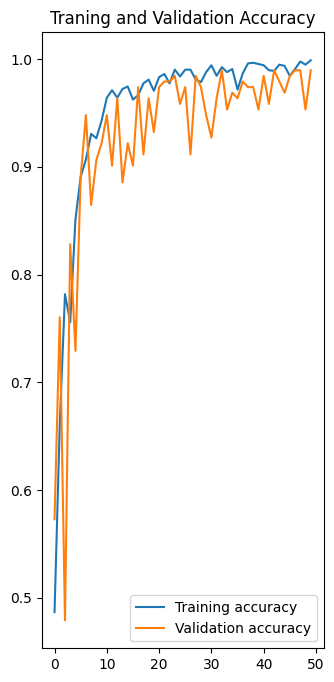

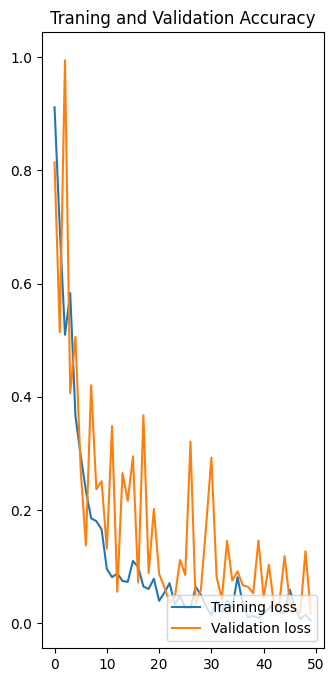

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),accuraacy,label="Training accuracy")
plt.plot(range(Epochs),val_acc,label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Traning and Validation Accuracy")

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label="Training loss")
plt.plot(range(Epochs),val_loss,label="Validation loss")
plt.legend(loc="lower right")
plt.title("Traning and Validation Accuracy")

1/1 [==============================] - 0s 66ms/step


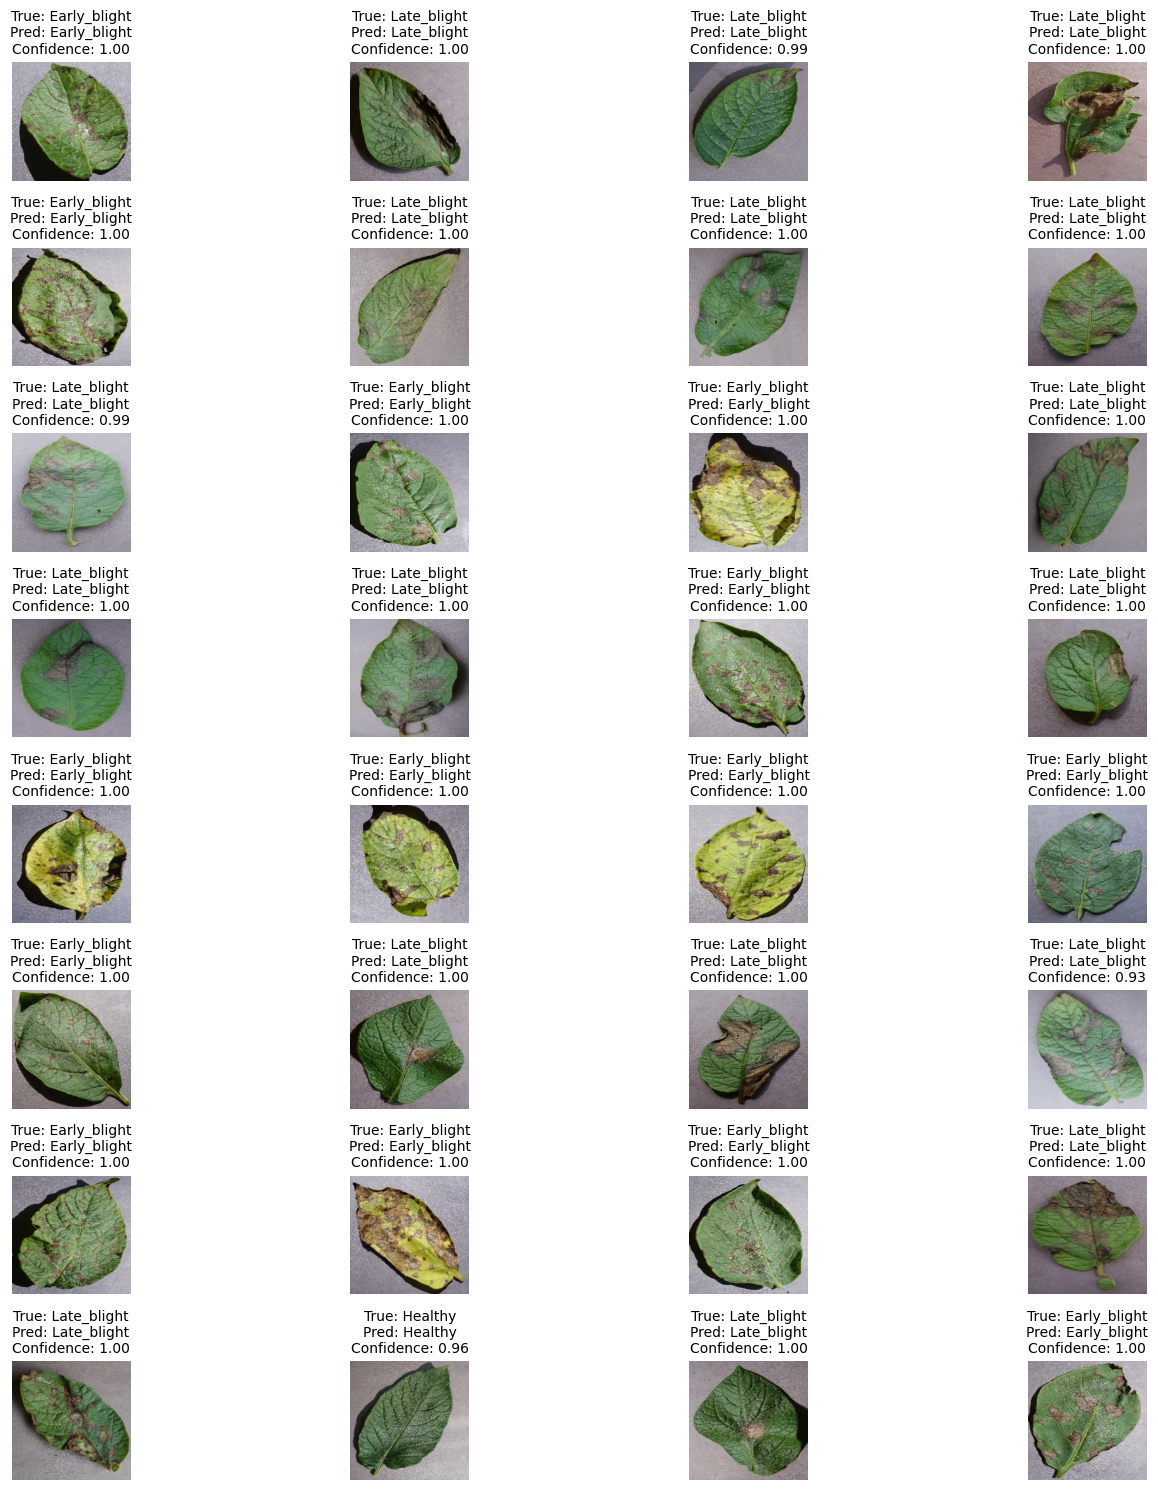

In [ ]:
def plot_images(images, labels_true, labels_pred, class_names, batch_predictions, nrows=4, ncols=8):
    fig = plt.figure(figsize=(15, 15))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        true_label = class_names[labels_true[i].numpy()]
        pred_label = class_names[labels_pred[i]]
        confidence = batch_predictions[i][labels_pred[i]]
        plt.title(f"True: {true_label}\nPred: {pred_label}\nConfidence: {confidence:.2f}", fontsize=10)
    plt.tight_layout()
    plt.show()

for images_batch, label_batch in test_ds.take(1):
    batch_predictions = model.predict(images_batch)
    predicted_labels = np.argmax(batch_predictions, axis=1)
    plot_images(images_batch, label_batch, predicted_labels, class_names, batch_predictions, nrows=8, ncols=4)


In [1]:
import os

In [ ]:
model_version=1
model.save(f"../Model/{model_version}")

INFO:tensorflow:Assets written to: ../Model/1\assets


INFO:tensorflow:Assets written to: ../Model/1\assets
